# Proyecto n° 1
## Módulo 6: Técnicas de Análisis de Datos

*Carla Iturriaga Barrios*

*Agosto, 2022*

### Presentación del proyecto.

*Una empresa dedicada a la compra y venta de vehículos usados, donde la **compra es anticipada** y la **venta es por modalidad de remate y venta al mejor postor**, obtiene pérdidas inmediatas a la hora de rematar algunos de sus vehículos, puesto que compran o aseguran el vehículo a un precio más alto del que, finalmente, se vende.*

*A raíz de esto, **la empresa busca asegurar los vehículos a un precio igual o más bajo que el de adjudicación**.*

### Objetivos del proyecto.

1. *Conocer las características que impactan el precio de venta del vehículo y en qué magnitud.*

2. *Predecir el precio de venta de autos usados a partir de los resultados históricos de venta.*

In [1]:
import codigo_y_data.dataset as d
##import proj_code.model as m
##import proj_code.metric as me
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

### 1. Datos

**Corresponden a una base de datos histórica de las adjudicaciones de vehículos dentro de remates realizados entre 2019 y 2020.**

**Cada registro entrega información sobre el vehículo, tales como marca, modelo, versión, año, kilometraje, origen, etc. Junto al precio asegurado y su precio de venta/adjudicación.**

*En adelante, se utilizaran las funciones definidas en el módulo `dataset.py` para facilitar la gestión y manejo de los datos.*

In [2]:
help(d.load_result)
data = d.load_result()
X, y = data['dataset']

Help on function load_result in module codigo_y_data.dataset:

load_result(URL='https://raw.githubusercontent.com/citurriagab/Data_Hist_Resultados/main/RESULTADO_2019_2020.csv')
    Va a buscar los resultados entre 2019 y 2020 de las adjudicaciones de vehículos en remates de la compania. Retorna "X / input" o variables dependientes (características del vehículo) e "y / output" correspondiente al precio de venta.'.

Datos cargados con éxito


Las dimensiones del *dataset* [Resultados_2019_2020](https://raw.githubusercontent.com/citurriagab/Data_Hist_Resultados/main/RESULTADO_2019_2020.csv) son las siguientes:

*Correspondientes a 5.436 registros de vehículos rematados entre los años definidos anteriormente, presentados en 12 diferentes variables dependientes sumado a la independiente.*

In [3]:
X.shape, y.shape

((5436, 12), (5436,))

#### Previsualización del dataset 

Al realizar una previsualización de los datos, se obtiene lo siguiente:

In [5]:
X.head(5)

,FECHA,LOTE,UNIDAD,TIPO,MARCA,MODELO,ANHO,TRACC,COMB,GTIA_MEC,MAG,KILOMETRAJE
0,29-07-2020,1,BFE,STATION WAGON,CHEVROLET,SUBURBAN 4X4 5.3 AUT,2018,4x4,B,NaN,20850000,41090.0
1,29-07-2020,2,PARTICULARES,STATION WAGON,KIA MOTORS,GRAND CARNIVAL EX 2.2 AUT,2018,4x2,D,NaN,13000000,113459.0
2,29-07-2020,3,BFE,STATION WAGON,BMW,X1 SDRIVE20I LUXURY 2.0 AUT,2017,AWD,B,NaN,10403228,32154.0
3,29-07-2020,4,BFE,STATION WAGON,CHEVROLET,CAPTIVA PREMIER 1.5,2020,4x2,B,NaN,8730000,13109.0
4,29-07-2020,5,PARTICULARES,STATION WAGON,SEAT,ATECA 4X4 1.4 AUT,2020,4x4,B,NaN,11000000,2066.0


In [4]:
y.head(5)

0    23100000
1    14400000
2    14700000
3    13000000
4    13600000
Name: ADJUDIC, dtype: int64

#### Análisis Estadístico

**¿Existen valores nulos o indeterminados en la variable independiente "Adjudicación"**

In [6]:
y.isna().sum()

0

*No existen registros con información indeterminada en la "adjudicación", es decir, la base de datos consta de todos los vehículos que fueron rematados a un determinado precio de venta*

**Estadística básica de la variable independiente "Adjudicación":**

In [7]:
y.describe()

count    5.436000e+03
mean     6.206003e+06
std      2.694914e+06
min      3.300000e+05
25%      4.400000e+06
50%      5.900000e+06
75%      7.600000e+06
max      4.550000e+07
Name: ADJUDIC, dtype: float64

*El precio de venta o adjudicación de los vehículos se mueve entre $330.000 y $45.500.000. Lo cual indica desde un principio que existen bienes que la brecha es grande entre el vehículo que se remata más barato en contraste con el más caro.*

*Además, la media y la mediana se distancian en $300.000, con una media mayor que la mediana, **indicando una distribución sesgada a la derecha**.*

**Identificación de valores outliers en variable independiente "Adjudicación"**

Limite inferior:  -400000.0
Limite superior:  12400000.0
Registros sobre el limite sup:  129


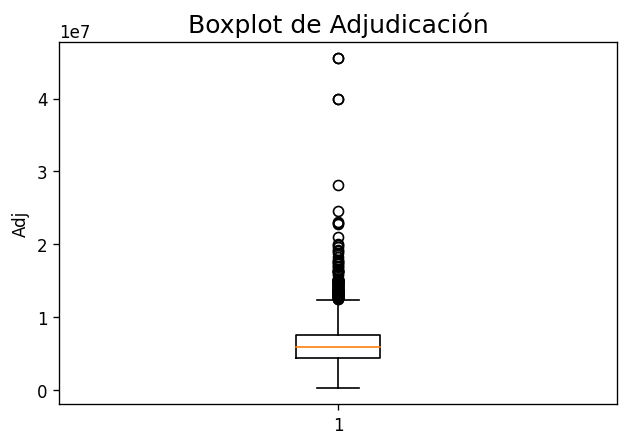

In [8]:
plt.figure(dpi=120);
plt.boxplot(y)
plt.title('Boxplot de Adjudicación', fontsize=15)
plt.ylabel('Adj', fontsize=10)
plt.text(6.5, -3.25, '')

#cuartiles
q3, q1 = np.percentile(y, [75, 25])
iqr = q3-q1
lim_sup = q3 + (1.5*iqr)
lim_inf = q1 - (1.5*iqr)

# limites
print('Limite inferior: ', lim_inf)
print('Limite superior: ', lim_sup)
print('Registros sobre el limite sup: ', y[y>lim_sup].count())

*De acuerdo al gráfico de boxplot anterior, se obtiene que la variable "Adjudicación" presenta valores atípicos al sobrepasar el precio de venta de $12.400.000, concentrando su movimiento bajo dicho valor.*

*Son **129 las observaciones outliers**, significando el **2,3% de la base total**. Sin embargo, se asume que se debe a autos de lujo o con características especiales que será importante conservar dentro del análisis. Por lo que, **se decide no excluir ni imputar dichas adjudicaciones atípicos**.*

**Distribución de la variable independiente "Adjudicación"**

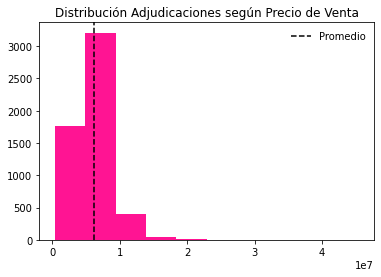

In [9]:
plt.hist(y, color="deeppink");
plt.axvline(y.mean(), linestyle='--', label='Promedio', color='black');
plt.title('Distribución Adjudicaciones según Precio de Venta');
plt.legend(frameon=False);

**Distribución de la variable independiente "Adjudicación" sin outliers**

*El gráfico de distribución del precio de venta puede ser más claro y excluimos los valores atípicos, sólo para efectos visuales*


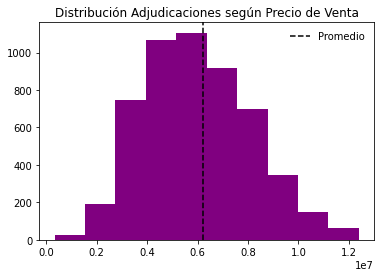

In [10]:
y1 = y[y<=lim_sup]

plt.hist(y1, color="purple");
plt.axvline(y.mean(), linestyle='--', label='Promedio', color='black');
plt.title('Distribución Adjudicaciones según Precio de Venta');
plt.legend(frameon=False);

*Al excluir los valores outliers de la muestra para visualizar la **distribución de la adjudicación**, el comportamiento parece ser normal, formando una campana de gauss casi perfecta.*

*Sin embargo, como anteriormente se mencionó, la media toma un valor menor que la mediana, presentando un pequeño sesgo hacia la derecha.*

### Modelo



In [68]:
Sección en que se utilizaremos los modelos especificados en el módulo `model.py`.

´Entrenaremos dos modelos:´

* Regresión Logistica
* Naive Bayess 

Los que requieren los datos de entrenamiento que consisten en pares de inputs (`X_train`) y output (`y_train`). Diferentes formas, pero que finalmente usaran los datos para "aprender" y ajustar sus parámetros.''

* separar la data en 2 o 3 (entrenar, testear y validar) con una semilla
* shape de train y test
* previsualización de train y test
* visualización ilustrativa??? -> scatter de 

SyntaxError: invalid syntax (2430456958.py, line 1)

*

In [ ]:
#@title
plt.figure(dpi=120);
CMAP='PuRd'
plt.scatter(X['Longitude'], X['Latitude'], c=y['target'], 
            cmap=CMAP, alpha=.2);
plt.colorbar(orientation='vertical', shrink=0.7).set_label(label='MedHouseVal', size=7.5);
plt.xlabel('Longitude');
plt.ylabel('Latitude');